# Airline Delays
## Identifying key factors affecting air travel punctuality.

### About the Dataset

This dataset, provided by the U.S. Department of Transportation's Bureau of Transportation Statistics (BTS), records the on-time performance of domestic flights operated by major U.S. air carriers. It includes detailed information about flight schedules, delays, cancellations, and diversions, as well as the causes of delays.

The dataset serves as a valuable resource for analyzing flight punctuality, exploring trends in air travel, and identifying factors influencing flight delays. The data collection began in June 2003, and it is updated monthly as part of the Air Travel Consumer Report.

This particular dataset consists of 1,247,488 rows and 30 columns, offering a comprehensive look at flight performance metrics. It includes raw data and summary statistics to facilitate both exploratory and predictive analyses, making it suitable for projects aimed at understanding and mitigating airline delays.

### Data description

#### **Flight Delay Dataset**

#### This dataset provides detailed information about domestic flights in the US during 2008. 
#### It includes various factors that can contribute to flight delays and cancellations.

#### **Column Descriptions:**

#### * **Year:** Year of the flight (2008)
#### * **Month:** Month of the year (1-12)
#### * **DayofMonth:** Day of the month (1-31)
#### * **DayOfWeek:** Day of the week (1: Monday, 7: Sunday)
#### * **DepTime:** Actual departure time (local, hhmm format)
#### * **CRSDepTime:** Scheduled departure time (local, hhmm format)
#### * **ArrTime:** Actual arrival time (local, hhmm format)
#### * **CRSArrTime:** Scheduled arrival time (local, hhmm format)
#### * **UniqueCarrier:** Unique carrier code
#### * **FlightNum:** Flight number
#### * **TailNum:** Plane tail number (aircraft registration)
#### * **ActualElapsedTime:** Actual elapsed time of the flight (in minutes)
#### * **CRSElapsedTime:** Scheduled elapsed time of the flight (in minutes)
#### * **AirTime:** Flight time (in minutes)
#### * **ArrDelay:** Arrival delay (in minutes)
#### * **DepDelay:** Departure delay (in minutes)
#### * **Origin:** Origin airport IATA code
#### * **Dest:** Destination airport IATA code
#### * **Distance:** Distance between origin and destination airports (in miles)
#### * **TaxiIn:** Taxi-in time at the destination airport (in minutes)
#### * **TaxiOut:** Taxi-out time at the origin airport (in minutes)
#### * **Cancelled:** Whether the flight was cancelled (1: Yes, 0: No)
#### * **CancellationCode:** Reason for cancellation (A: Carrier, B: Weather, C: NAS, D: Security)
#### * **Diverted:** Whether the flight was diverted (1: Yes, 0: No)
#### * **CarrierDelay:** Delay due to carrier-specific issues (in minutes)
#### * **WeatherDelay:** Delay due to weather conditions (in minutes)
#### * **NASDelay:** Delay due to National Airspace System (NAS) issues (in minutes)
#### * **SecurityDelay:** Delay due to security-related issues (in minutes)
#### * **LateAircraftDelay:** Delay due to the late arrival of the same aircraft at a previous airport (in minutes) at a previous airport (in minutes) at a previous airport (in minutes) a previous airport (in minutes) at a previous airport (in minutes)

### Importing the Libraries ;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the data:

In [3]:
data=pd.read_csv('sampled_dataset.csv')
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,3062286,2008,6,22,7,1853.0,1545,2015.0,1720,WN,...,4.0,8.0,0,N,0,0.0,0.0,175.0,0.0,0.0
1,4016611,2008,7,23,3,1013.0,935,1120.0,1040,MQ,...,8.0,10.0,0,N,0,0.0,0.0,2.0,0.0,38.0
2,5333859,2008,9,6,6,1806.0,1800,2232.0,2146,B6,...,4.0,92.0,0,N,0,0.0,0.0,46.0,0.0,0.0
3,169030,2008,1,31,4,739.0,640,950.0,818,OH,...,17.0,51.0,0,N,0,59.0,0.0,33.0,0.0,0.0
4,5748551,2008,10,9,4,2122.0,2100,2237.0,2205,MQ,...,9.0,23.0,0,N,0,22.0,0.0,10.0,0.0,0.0


In [3]:
df = data.copy()
df.head(3)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,3062286,2008,6,22,7,1853.0,1545,2015.0,1720,WN,...,4.0,8.0,0,N,0,0.0,0.0,175.0,0.0,0.0
1,4016611,2008,7,23,3,1013.0,935,1120.0,1040,MQ,...,8.0,10.0,0,N,0,0.0,0.0,2.0,0.0,38.0
2,5333859,2008,9,6,6,1806.0,1800,2232.0,2146,B6,...,4.0,92.0,0,N,0,0.0,0.0,46.0,0.0,0.0


### Basic analysis:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         400000 non-null  int64  
 1   Year               400000 non-null  int64  
 2   Month              400000 non-null  int64  
 3   DayofMonth         400000 non-null  int64  
 4   DayOfWeek          400000 non-null  int64  
 5   DepTime            400000 non-null  float64
 6   CRSDepTime         400000 non-null  int64  
 7   ArrTime            400000 non-null  float64
 8   CRSArrTime         400000 non-null  int64  
 9   UniqueCarrier      400000 non-null  object 
 10  FlightNum          400000 non-null  int64  
 11  TailNum            399999 non-null  object 
 12  ActualElapsedTime  400000 non-null  float64
 13  CRSElapsedTime     400000 non-null  float64
 14  AirTime            400000 non-null  float64
 15  ArrDelay           400000 non-null  float64
 16  De

In [5]:
df.shape

(400000, 30)

In [6]:
col=df.columns.to_list()
print(col)

['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [7]:
#droping unwanted columns
df1=df.drop(['Unnamed: 0','FlightNum','TailNum','Diverted','CancellationCode','Origin','Dest','Year','UniqueCarrier','Cancelled'],axis=1)

In [8]:
df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6,22,7,1853.0,1545,2015.0,1720,82.0,95.0,70.0,175.0,188.0,495,4.0,8.0,0.0,0.0,175.0,0.0,0.0
1,7,23,3,1013.0,935,1120.0,1040,67.0,65.0,49.0,40.0,38.0,247,8.0,10.0,0.0,0.0,2.0,0.0,38.0
2,9,6,6,1806.0,1800,2232.0,2146,446.0,406.0,350.0,46.0,6.0,2576,4.0,92.0,0.0,0.0,46.0,0.0,0.0
3,1,31,4,739.0,640,950.0,818,131.0,98.0,63.0,92.0,59.0,431,17.0,51.0,59.0,0.0,33.0,0.0,0.0
4,10,9,4,2122.0,2100,2237.0,2205,75.0,65.0,43.0,32.0,22.0,281,9.0,23.0,22.0,0.0,10.0,0.0,0.0


In [51]:
# 'Unnamed: 0': This column appears to be an index with no meaningful data.
# 'FlightNum': The flight number is a unique identifier that doesn't contribute to predicting delays.
# 'TailNum': The aircraft registration number is irrelevant to delay analysis.
# 'Diverted': This column only contains a single value (0), indicating no flights were diverted, so it provides no variance.
# 'CancellationCode': This column contains a single value ('N'), which also lacks variance and is therefore not useful.
#  Origin : This column wont be helpful for predicting the delay
# Dest : Destination airport, not relevant for analysis
# 'Year' :  Year of the flight, not relevant for analysis
# 'UniqueCarrier' : Unique carrier code, not relevant for analysis
# 'Cancelled' : Whether the flight was cancelled, not relevant

In [9]:
num=df1.select_dtypes(include=np.number).columns.to_list()
print(num)

['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [10]:
df1.shape

(400000, 20)

### Cleaning the data:

#### Checking for null values

In [11]:
#checking the percentage of null values:
(df1.isna().sum() / len(df1)) * 100

Month                0.0
DayofMonth           0.0
DayOfWeek            0.0
DepTime              0.0
CRSDepTime           0.0
ArrTime              0.0
CRSArrTime           0.0
ActualElapsedTime    0.0
CRSElapsedTime       0.0
AirTime              0.0
ArrDelay             0.0
DepDelay             0.0
Distance             0.0
TaxiIn               0.0
TaxiOut              0.0
CarrierDelay         0.0
WeatherDelay         0.0
NASDelay             0.0
SecurityDelay        0.0
LateAircraftDelay    0.0
dtype: float64

There are no null values in the dataset.
Hence, no missing value imputation is required at this stage.

#### Checking for the skew of the variables

In [12]:
df1[num].skew()

Month                 0.252032
DayofMonth           -0.001898
DayOfWeek             0.004435
DepTime              -0.545987
CRSDepTime           -0.283466
ArrTime              -1.159817
CRSArrTime           -0.762850
ActualElapsedTime     1.430082
CRSElapsedTime        1.469656
AirTime               1.519876
ArrDelay              4.095077
DepDelay              4.162817
Distance              1.590179
TaxiIn                5.711419
TaxiOut               3.922633
CarrierDelay          7.638978
WeatherDelay         12.089963
NASDelay              5.043263
SecurityDelay        44.919759
LateAircraftDelay     3.294846
dtype: float64

### DATA VISUALIZATION

####  UNIVARIATE ANALYSIS

Distribution of the numerical variables

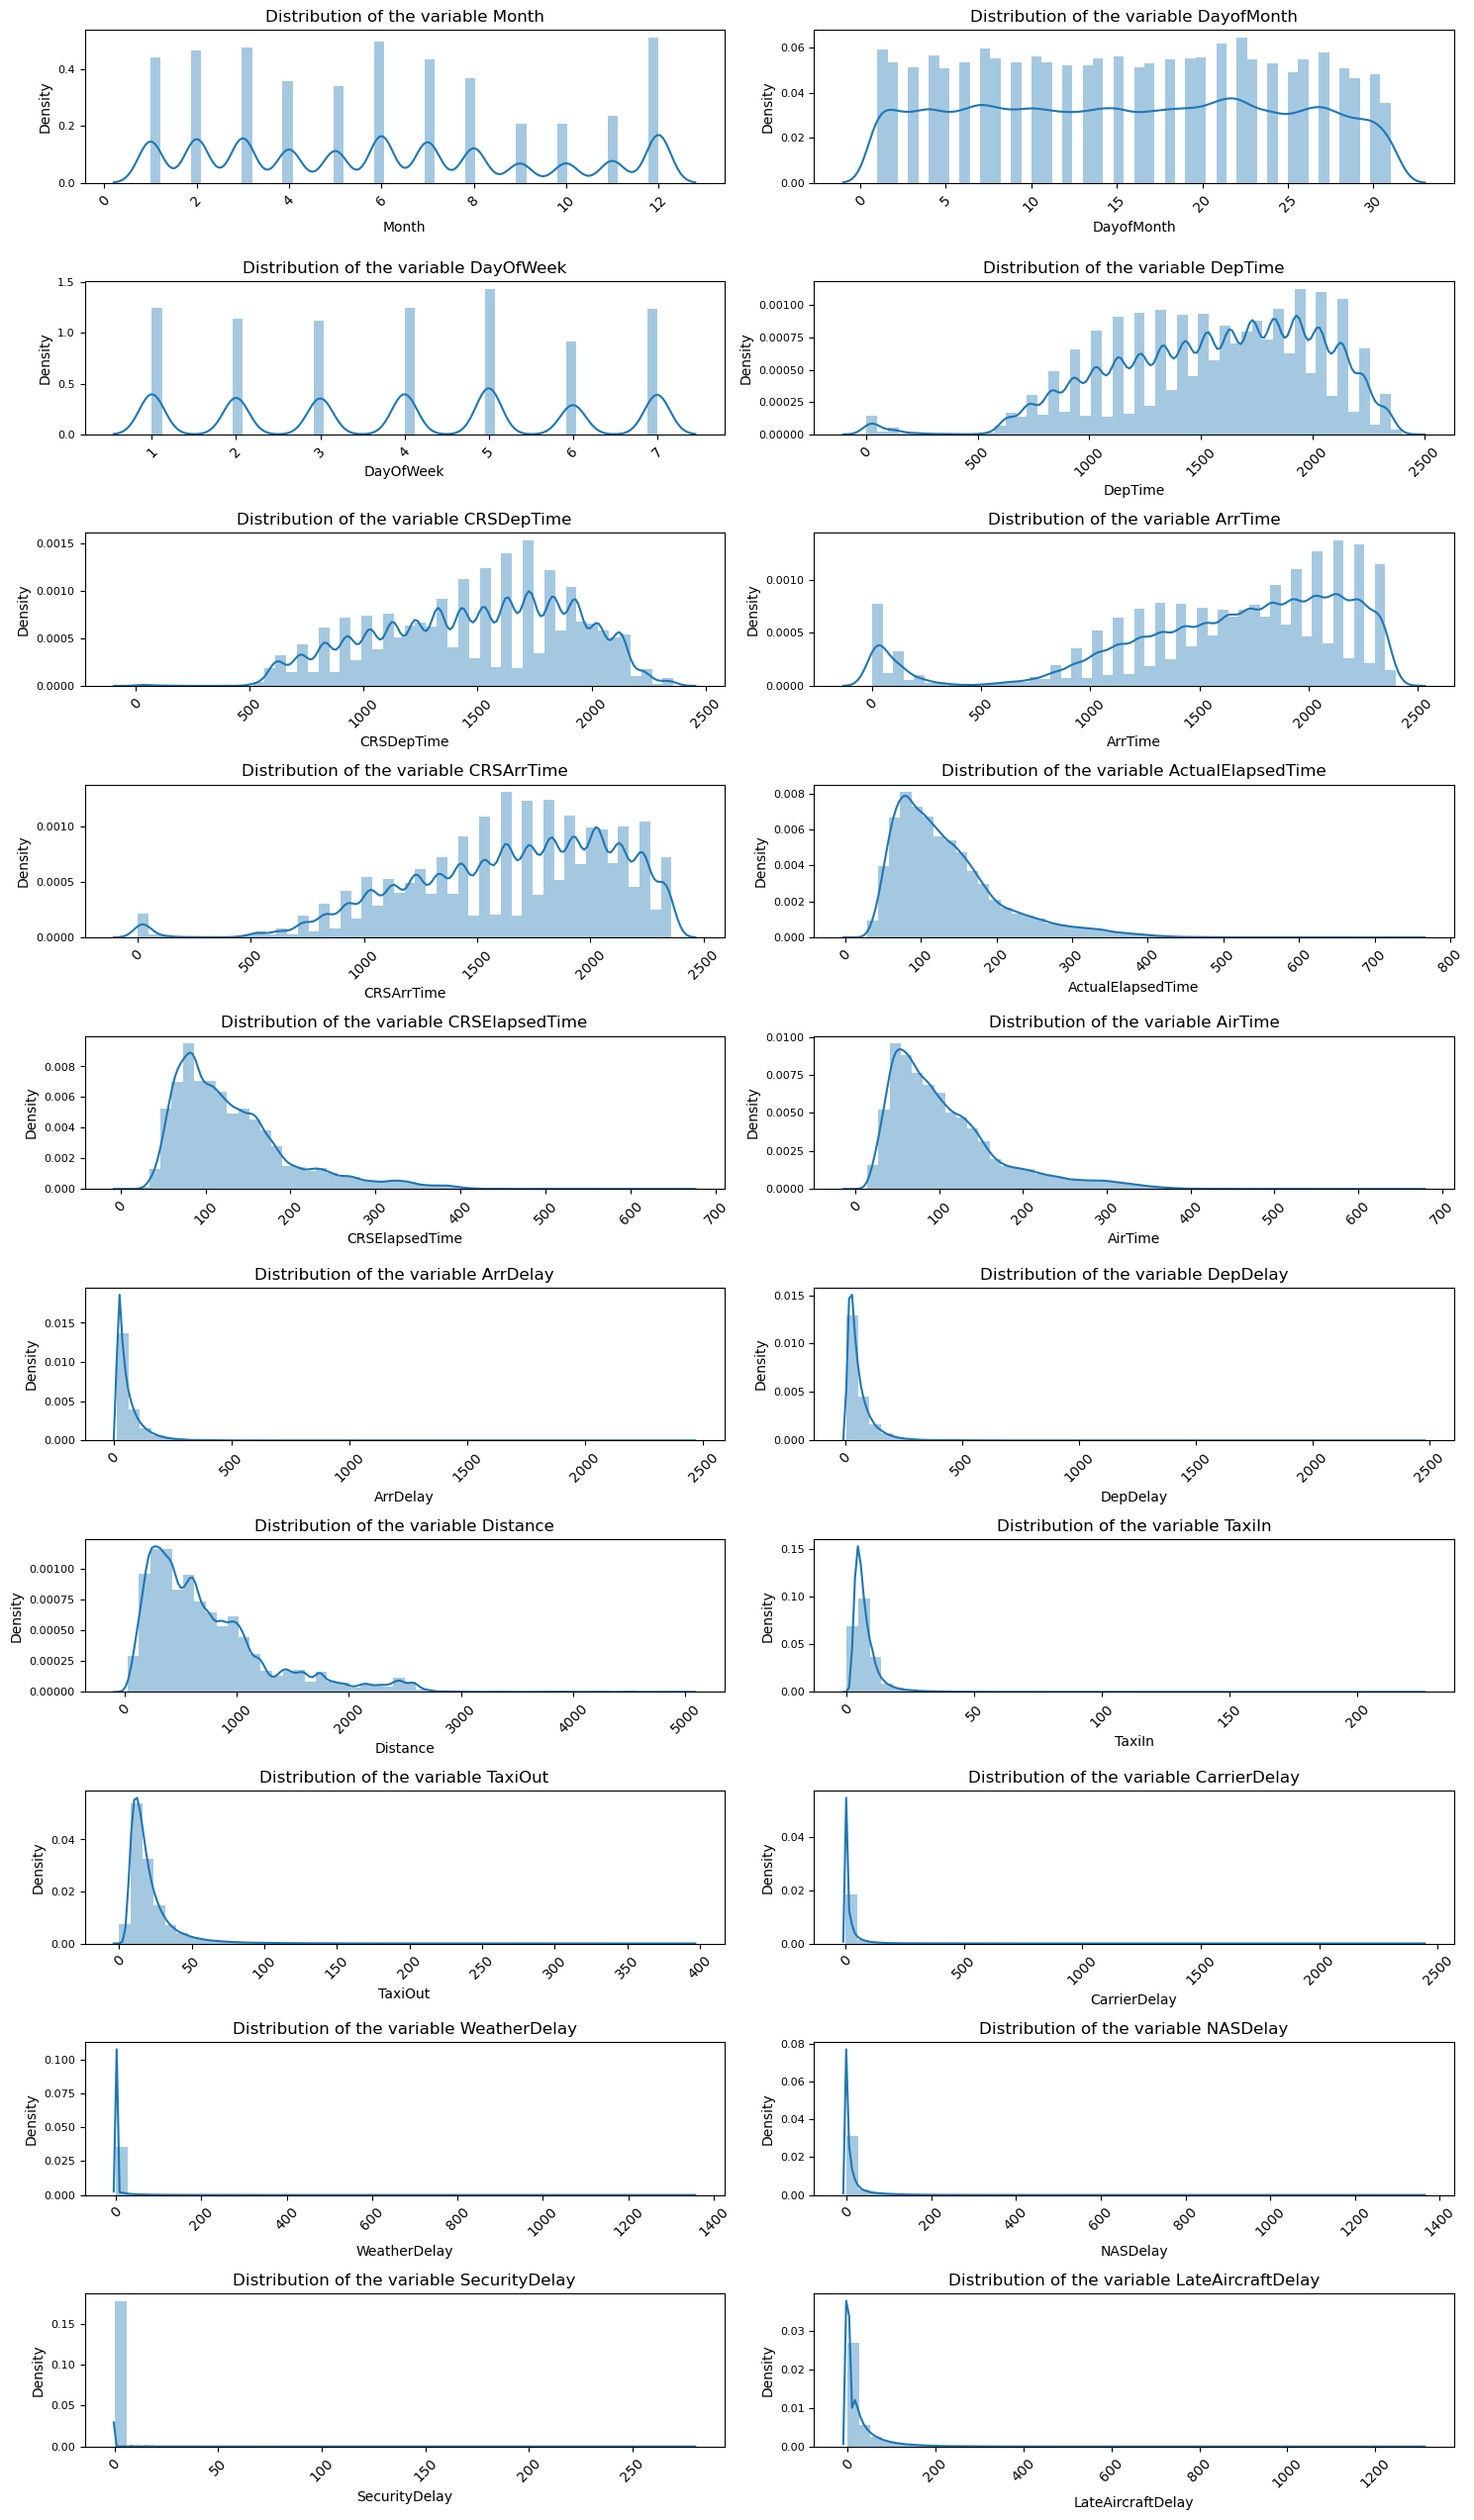

In [14]:
plt.figure(figsize=(15,30))
t=1
for i in num:
    plt.subplot(12,2,t)
    sns.distplot(df[i])
    plt.title(f'Distribution of the variable {i}')
    plt.xticks(rotation=45) 
    plt.yticks(fontsize=8) 
    t+=1
plt.tight_layout()
plt.show()

The above plots are compiled density graphs of all the numerical variables.

Observations:
* The features Month, DayofMonth and DayOfWeek exhibit a similar distribution indicating that delays occur uniformly across all days and months.
* DepTime: For the Departure time which is in the format hhmm, the distribution is not uniform. There are clear peaks of delays around 10 am til 8 pm. There is a noticeable peak around 0 minutes. This indicates that there are some delays even for early morning flights.
* The features ActualElapsedTime and AirTime both exhibit a similar distribution that is the distribution is heavily right-skewed, indicating there are more flights with shorter actual elapsed times and fewer with longer durations.
* The features ArrDelay, carrieDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircreaftDelay does not have much data points and the distribution is extremely right skewed for all the features. 
* Distance: The distribution of Distance is right-skewed. There are more shorter flights with delays than longer ones. The peak around the distance range 1000-1500 miles suggests that flights within this distance bracket are more likely to experience delays. The density decreases as the distance increases, indicating that longer flights are less likely to be delayed.


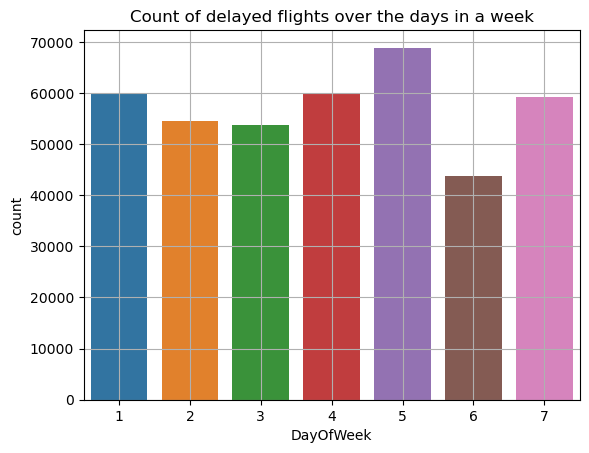

In [12]:
sns.countplot(x=df['DayOfWeek'])
plt.title('Count of delayed flights over the days in a week')
plt.grid()
plt.show()

The plot demonstrates that the number of delayed flights varies significantly across different days of the week.

Observations:
* The highest number of delays appears to occur on Day 5, followed by Day 4.
* On the other hand, Day 1 and Day 7 seem to have the lowest number of delays, indicating that flights on these days are relatively less likely to be delayed. The lower number of delays on weekends (Day 1 and Day 7) could be attributed to reduced air traffic volume during these periods.

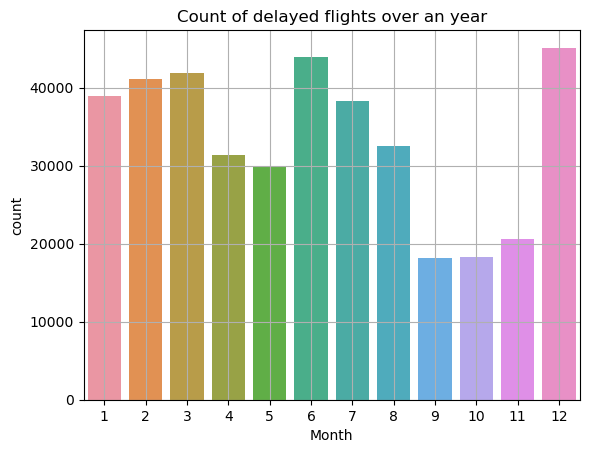

In [13]:
sns.countplot(x=df['Month'])
plt.title('Count of delayed flights over an year')
plt.grid()
plt.show()

The plot demonstrates that the number of delayed flights varies significantly across different months of the year.

Observations:
* The highest number of delays appears to occur in Month 6 and Month 12. On the other hand, Month 9 seems to have the lowest number of delays.
*  The higher number of delays in certain months (Month 6 and Month 12) could be attributed to seasonal weather patterns, such as thunderstorms, which can disrupt flight operations. The variation in delay counts across months might also be influenced by seasonal variations in travel demand. For instance, months with higher travel demand (summer vacations, winter holidays) might experience more delays due to increased air traffic.

#### BIVARIATE ANALYSIS

Numeric vs Numeric: Relationship between target variable and the numeric variables

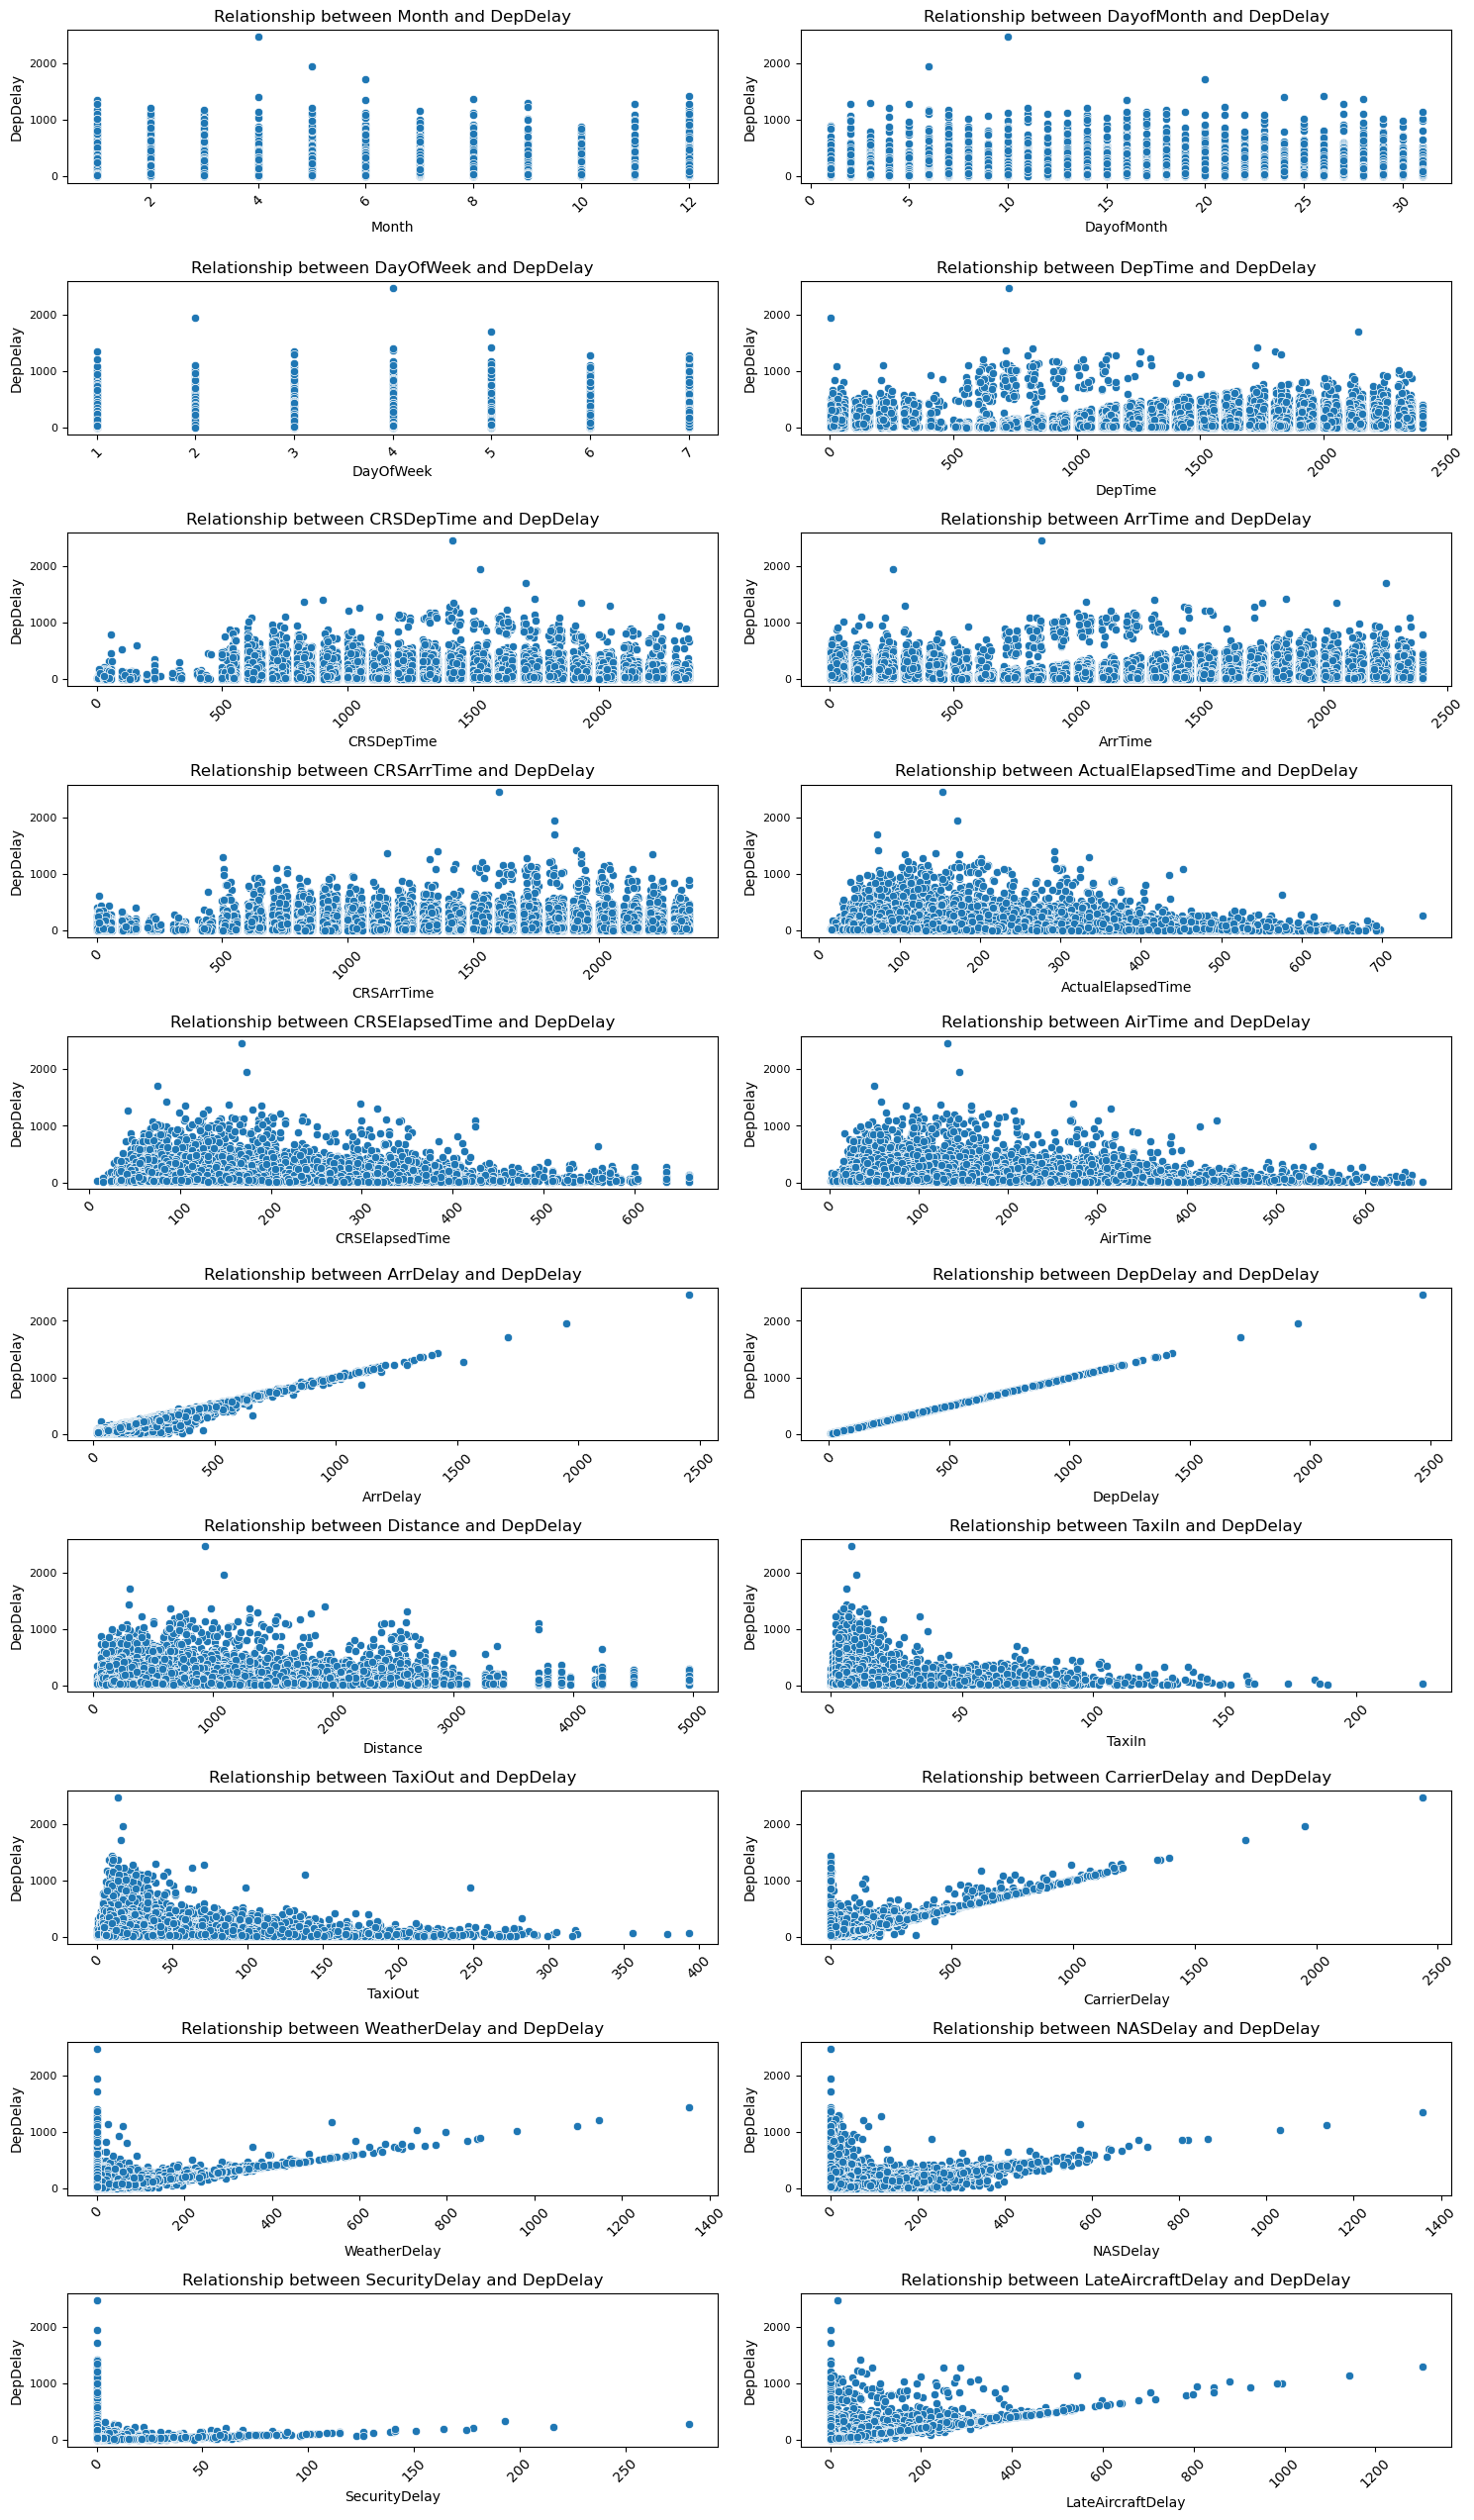

In [120]:
plt.figure(figsize=(15,30))
t=1
for i in num:
    plt.subplot(12,2,t)
    sns.scatterplot(x=df[i],y=df['DepDelay'])
    plt.title(f'Relationship between {i} and DepDelay')
    plt.xticks(rotation=45) 
    plt.yticks(fontsize=8) 
    t+=1
plt.tight_layout()
plt.show()

The above plots are compiled scatter plots between the target variable Departure delay (DepDelay) and the other numerical variables.

Observations:
* There is no clear relationship between features such as DepTime, CRSDepTime, ArrTime, CSRArrTime, ActualElapsedTime, CSRElapsedTime, AirTime, Distance,Taxiin and TaxiOut and the target variable as there are points scattered across the plots.
* The features such as ArrDelay, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay have a slight to moderate positive correlation with the target column.

#### MULTIVARIATE ANALYSIS

In [15]:
corr_matrix=df[num].corr()
corr_matrix

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,1.000000,0.065787,0.009236,-0.009232,-0.013770,-0.004183,-0.003149,0.003496,0.006709,0.000013,0.012437,0.016197,0.005491,0.024792,0.006154,0.003454,0.007836,0.010714,-0.001843,0.001827
DayofMonth,0.065787,1.000000,0.027804,0.002171,0.001782,0.001072,0.000846,0.000725,0.001155,0.000976,0.009469,0.010080,0.000623,-0.000495,-0.000671,-0.000817,0.000884,0.005806,-0.001572,0.009473
DayOfWeek,0.009236,0.027804,1.000000,0.022074,0.028503,0.007362,0.017032,0.004098,0.005459,0.005492,0.012303,0.013882,0.008591,0.009780,-0.008210,0.010818,0.005217,-0.006612,0.004596,0.009075
DepTime,-0.009232,0.002171,0.022074,1.000000,0.839226,0.374533,0.713721,-0.058004,-0.042680,-0.059643,0.093312,0.115178,-0.056234,-0.025974,0.001747,-0.054262,0.003986,0.023737,-0.014517,0.170899
CRSDepTime,-0.013770,0.001782,0.028503,0.839226,1.000000,0.288289,0.725413,-0.039005,-0.020535,-0.035742,0.018801,0.042310,-0.023645,-0.043575,-0.007246,-0.107876,-0.008487,-0.032313,-0.014992,0.170578
ArrTime,-0.004183,0.001072,0.007362,0.374533,0.288289,1.000000,0.482539,-0.026111,-0.026949,-0.029878,-0.078844,-0.079828,-0.042246,0.042699,-0.006457,-0.084934,-0.030531,0.032187,-0.008853,-0.036126
CRSArrTime,-0.003149,0.000846,0.017032,0.713721,0.725413,0.482539,1.000000,0.033398,0.047156,0.028595,0.025338,0.040169,0.030550,0.004728,0.026165,-0.097314,-0.003953,0.008808,-0.012480,0.133258
ActualElapsedTime,0.003496,0.000725,0.004098,-0.058004,-0.039005,-0.026111,0.033398,1.000000,0.964698,0.969136,0.082645,-0.002774,0.944383,0.162072,0.314511,0.008289,0.005161,0.175974,0.004906,-0.034669
CRSElapsedTime,0.006709,0.001155,0.005459,-0.042680,-0.020535,-0.026949,0.047156,0.964698,1.000000,0.983870,0.029988,0.027329,0.981240,0.091840,0.126645,0.024749,-0.014460,0.045643,0.005258,-0.012250
AirTime,0.000013,0.000976,0.005492,-0.059643,-0.035742,-0.029878,0.028595,0.969136,0.983870,1.000000,0.026155,-0.000639,0.978203,0.075432,0.085877,0.017768,-0.016667,0.062074,0.006404,-0.022822


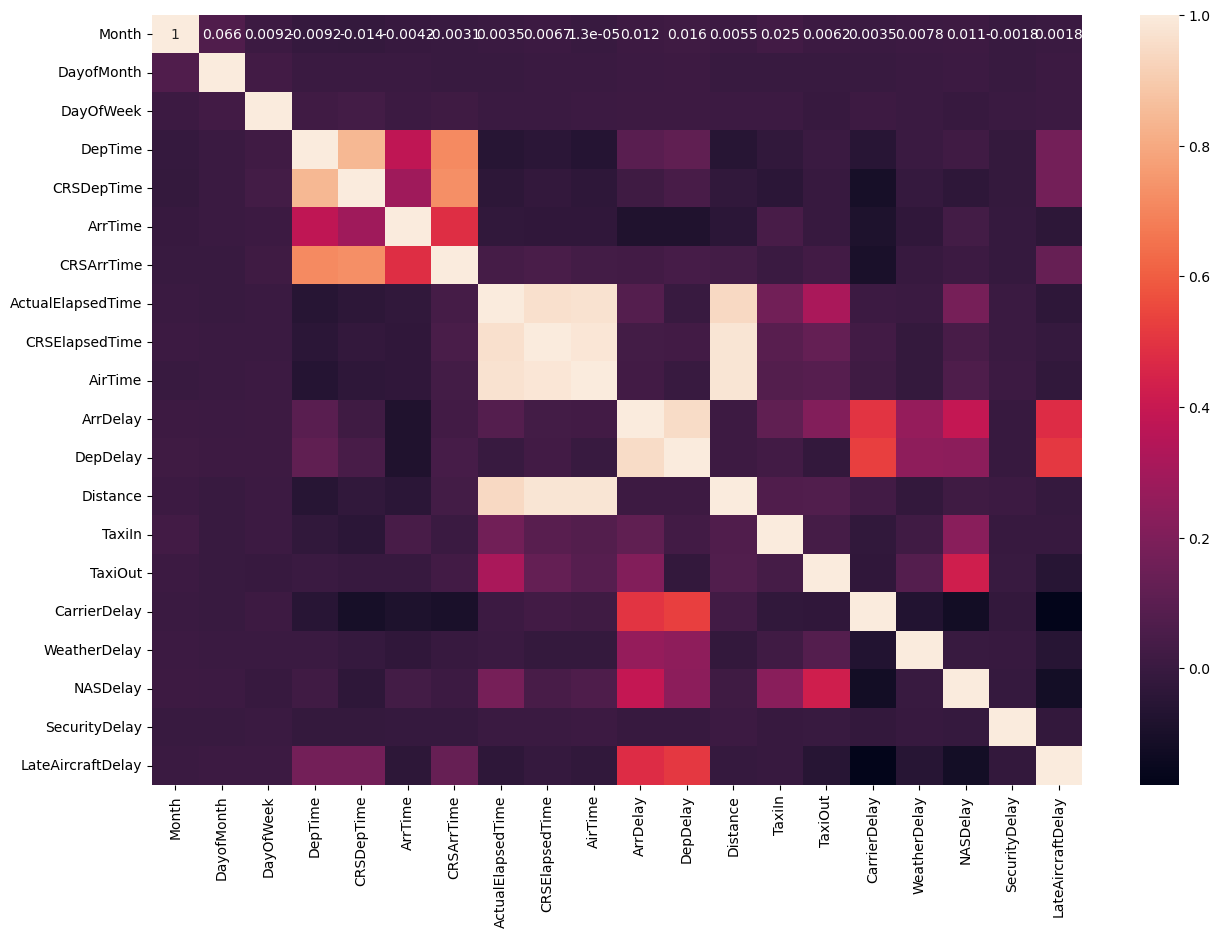

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num].corr(),annot=True)
plt.show()

Observations:
* Strong Positive Correlation with ArrDelay (0.950397). This strong positive correlation indicates that flights with longer departure delays are highly likely to have longer arrival delays as well. This suggests that factors causing departure delays, such as air traffic control issues often have a cascading effect on arrival times.
* Moderate Positive Correlation with CarrierDelay (0.528902), WeatherDelay (0.240940), and NASDelay (0.238821). These moderate positive correlations suggest that delays caused by airline operations, weather conditions, and air traffic control issues contribute to longer departure delays. These factors can disrupt flight schedules and lead to cascading delays.

### OUTLIERS AND ITS TREATMENT

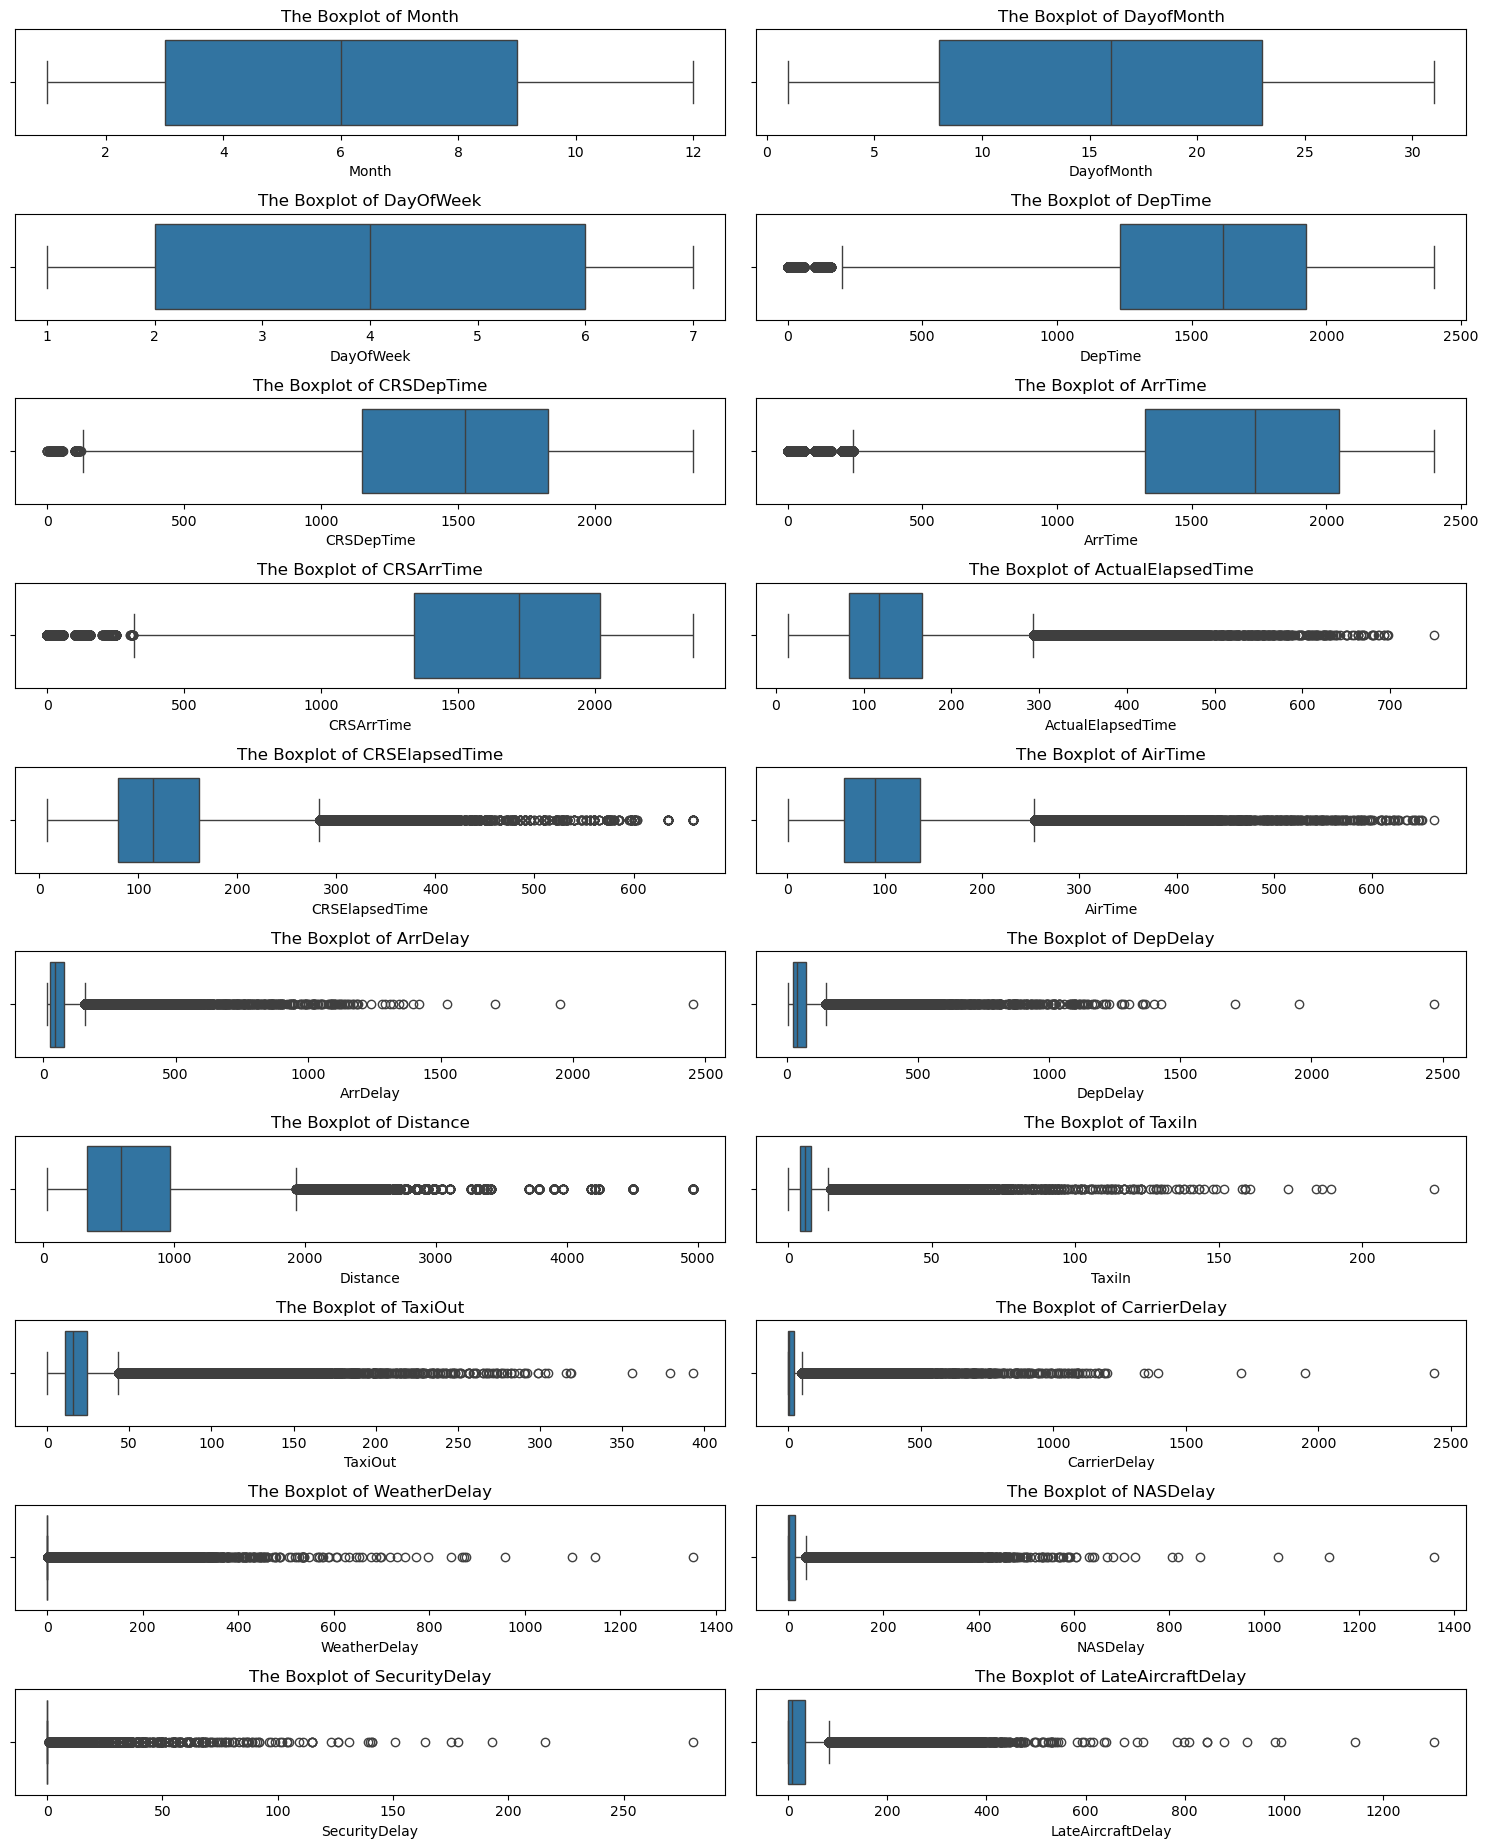

In [58]:
t = 1
plt.figure(figsize=(15, 20))  
for i in num:
    plt.subplot(11,2,t) 
    sns.boxplot(data=df1, x=i)  
    plt.title(f'The Boxplot of {i}')  
    t += 1
plt.tight_layout()  
plt.show()

In [ ]:
## check vif before or after transformation
## explanation on outliers treatment

### Transformation

In [17]:
from sklearn.preprocessing import PowerTransformer

In [18]:
pw=PowerTransformer()

In [19]:
pt = PowerTransformer(method='yeo-johnson') 
transformed_data = pt.fit_transform(df1)
df2 = pd.DataFrame(transformed_data, columns=df1.columns)

In [20]:
df2.skew()

Month                -0.107039
DayofMonth           -0.214643
DayOfWeek            -0.137406
DepTime              -0.221832
CRSDepTime           -0.137679
ArrTime              -0.686174
CRSArrTime           -0.303534
ActualElapsedTime     0.007190
CRSElapsedTime        0.012071
AirTime               0.001691
ArrDelay              0.073355
DepDelay              0.004205
Distance             -0.009670
TaxiIn               -0.018929
TaxiOut              -0.009063
CarrierDelay          0.217160
WeatherDelay          3.119492
NASDelay              0.265372
SecurityDelay        14.247092
LateAircraftDelay     0.090789
dtype: float64

### Model Building:

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge

In [23]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
import numpy as np
import pandas as pd

score_card = pd.DataFrame(columns=[
    'model name', 
    'RMSE Test', 'R2 Test', 
    'MAPE Test'
])

def update_score_card(name, ypred, ytest):
    mse_test = mean_squared_error(ytest, ypred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(ytest, ypred)
    mape_test=mean_absolute_percentage_error(ytest,ypred)
    
    global score_card
    score_card = pd.concat([score_card, pd.DataFrame({
        'model name': [name],
        'RMSE Test': [rmse_test],
        'R2 Test': [r2_test],
        'MAPE Test': [mape_test]
    })], ignore_index=True)
    
    return score_card

In [24]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [25]:
x=df2.drop('DepDelay',axis=1)
y=df2.DepDelay

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [27]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(280000, 19)
(280000,)
(120000, 19)
(120000,)


### Statsmodels

In [28]:
import statsmodels.api as sma

In [29]:
xtrain_sma = sma.add_constant(xtrain)  
model = sma.OLS(ytrain, xtrain_sma).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               DepDelay   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 9.664e+04
Date:                Sat, 30 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:55:32   Log-Likelihood:            -1.1447e+05
No. Observations:              280000   AIC:                         2.290e+05
Df Residuals:                  279980   BIC:                         2.292e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0004      0.00

### 1.LinearRegression Model 

In [30]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [31]:
ypred_LR=lr.predict(xtest)

In [32]:
update_score_card('LinearRegression',ypred_LR,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.36586,0.865382,0.782724


### 2.Ridge Model 

In [33]:
r=Ridge()
r.fit(xtrain,ytrain)

Ridge()

In [34]:
ypred_r=r.predict(xtest)

In [35]:
update_score_card('Ridge',ypred_r,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.36586,0.865382,0.782724
1,Ridge,0.36586,0.865383,0.782735


### 3.DecisionTreeRegressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [38]:
ypred_dt=dt.predict(xtest)

In [39]:
update_score_card('DecisionTreeRegressor',ypred_dt,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.365860,0.865382,0.782724
1,Ridge,0.365860,0.865383,0.782735
2,DecisionTreeRegressor,0.247224,0.938531,0.432862


### 3.AdaBoostRegressor

In [40]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [41]:
ada=AdaBoostRegressor()
ada.fit(xtrain,ytrain)

AdaBoostRegressor()

In [42]:
ypred_ada=ada.predict(xtest)
update_score_card('AdaBoostRegressor',ypred_ada,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.365860,0.865382,0.782724
1,Ridge,0.365860,0.865383,0.782735
2,DecisionTreeRegressor,0.247224,0.938531,0.432862
3,AdaBoostRegressor,0.636616,0.592406,2.439235


### 4.RandomForestRegressor

In [43]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [44]:
ypred_rf=rf.predict(xtest)
update_score_card('RandomForestRegressor',ypred_rf,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.365860,0.865382,0.782724
1,Ridge,0.365860,0.865383,0.782735
2,DecisionTreeRegressor,0.247224,0.938531,0.432862
3,AdaBoostRegressor,0.636616,0.592406,2.439235
4,RandomForestRegressor,0.169096,0.971243,0.303521


### 5.GradientBoostingRegressor

In [45]:
gb=GradientBoostingRegressor()
gb.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [46]:
ypred_gb=gb.predict(xtest)
update_score_card('GradientBoostingRegressor',ypred_gb,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.365860,0.865382,0.782724
1,Ridge,0.365860,0.865383,0.782735
2,DecisionTreeRegressor,0.247224,0.938531,0.432862
3,AdaBoostRegressor,0.636616,0.592406,2.439235
4,RandomForestRegressor,0.169096,0.971243,0.303521
5,GradientBoostingRegressor,0.273484,0.924779,0.726854


Hyperparameter tuning is super important here because it helps us squeeze out the best performance from our models. Right now, RandomForest looks like the winner, but tuning parameters like n_estimators and max_depth could make it even better.

For DecisionTree, it’s performing well, but without tuning, it might overfit or underfit. Tweaking stuff like max_depth will help balance that out.

AdaBoost is struggling—it has a super high MAPE, meaning its predictions are kinda all over the place. By tuning learning_rate and n_estimators, we can stabilize its performance.

Even for Ridge, tuning the regularization (alpha) could help reduce overfitting and improve accuracy slightly.

Basically, hyperparameter tuning helps us get more reliable and accurate models, making them better suited for real-world predictions.

In [ ]:
# remove ridge

### 6.Ridge Model with tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
ridge=Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100] 
}
Ridge_gs = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=4)
Ridge_gs.fit(xtrain, ytrain)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [49]:
print("Best Parameters:", Ridge_gs.best_params_)

Best Parameters: {'alpha': 1}


In [50]:
ypred_ridge_gs=Ridge_gs.predict(xtest)
update_score_card('Ridge with Tuning',ypred_ridge_gs,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.365860,0.865382,0.782724
1,Ridge,0.365860,0.865383,0.782735
2,DecisionTreeRegressor,0.247224,0.938531,0.432862
3,AdaBoostRegressor,0.636616,0.592406,2.439235
4,RandomForestRegressor,0.169096,0.971243,0.303521
5,GradientBoostingRegressor,0.273484,0.924779,0.726854
6,Ridge with Tuning,0.365860,0.865383,0.782735


### 7.DecisionTreeRegressor with Tuning

In [51]:
param_grid = {
    'max_depth': [None, 3, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4, 10],   
    'splitter': ['best', 'random']}

In [52]:
dt_gs=GridSearchCV(estimator=dt,param_grid=param_grid,scoring='r2',cv=5)
dt_gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [54]:
print("Best Parameters:", dt_gs.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}


In [55]:
ypred_dt_gs=dt_gs.predict(xtest)
update_score_card('DecisionTreeRegressor with Tuning',ypred_dt_gs,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.365860,0.865382,0.782724
1,Ridge,0.365860,0.865383,0.782735
2,DecisionTreeRegressor,0.247224,0.938531,0.432862
3,AdaBoostRegressor,0.636616,0.592406,2.439235
4,RandomForestRegressor,0.169096,0.971243,0.303521
5,GradientBoostingRegressor,0.273484,0.924779,0.726854
6,Ridge with Tuning,0.365860,0.865383,0.782735
7,DecisionTreeRegressor with Tuning,0.214661,0.953658,0.436216


### 8.RandomForestRegressor with tuning

In [56]:
param_grid = {
    'n_estimators': [10,20],  
    'max_depth': [10, 20],  
    'min_samples_split': [5,10], 
    'min_samples_leaf': [2,4]
}
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=3)

In [57]:
rf_gs.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 20]},
             scoring='r2')

In [58]:
ypred_rf_gs=rf_gs.predict(xtest)
update_score_card('RandomForestRegressor with tuning ',ypred_rf_gs,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.365860,0.865382,0.782724
1,Ridge,0.365860,0.865383,0.782735
2,DecisionTreeRegressor,0.247224,0.938531,0.432862
3,AdaBoostRegressor,0.636616,0.592406,2.439235
4,RandomForestRegressor,0.169096,0.971243,0.303521
5,GradientBoostingRegressor,0.273484,0.924779,0.726854
6,Ridge with Tuning,0.365860,0.865383,0.782735
7,DecisionTreeRegressor with Tuning,0.214661,0.953658,0.436216
8,RandomForestRegressor with tuning,0.178885,0.967817,0.366881


### Checking for Multicollinearity

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(df2.shape[1]):
    vif.append(variance_inflation_factor(df2, i))
pd.DataFrame(vif, index=df2.columns, columns=['VIF']).sort_values(by='VIF', ascending=False)

,VIF
AirTime,61.427065
ActualElapsedTime,48.935640
CRSElapsedTime,42.724372
Distance,28.344871
ArrDelay,7.591951
DepDelay,7.519328
CRSDepTime,4.970055
DepTime,4.893478
TaxiOut,3.403962
CRSArrTime,3.322355


Remove columns with high VIF (Variance Inflation Factor) to avoid multicollinearity.

High VIF indicates that the columns are highly correlated with each other.

### Model Building with important features

In [59]:
df3=df2.drop(['AirTime','ActualElapsedTime'],axis=1)
df3.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.114733,0.735307,1.445885,0.637778,0.098237,0.708991,0.079249,-0.391148,1.617630,1.762246,-0.218421,-0.718200,-1.377771,-0.984183,-0.293067,1.752341,-0.069848,-1.046929
1,0.380267,0.835222,-0.437584,-1.222828,-1.301224,-0.988156,-1.355203,-1.230311,-0.112379,-0.105975,-1.098250,0.560732,-0.910048,-0.984183,-0.293067,-0.001794,-0.069848,0.976847
2,0.864708,-1.096294,1.005531,0.523418,0.733739,1.172095,1.144904,2.357842,0.088001,-2.311193,2.135505,-0.718200,2.360298,-0.984183,-0.293067,1.396766,-0.069848,-1.046929
3,-1.686257,1.599289,0.068530,-1.729796,-1.900330,-1.264443,-1.740254,-0.324740,0.962635,0.418460,-0.398686,1.697372,1.715497,1.358966,-0.293067,1.285754,-0.069848,-1.046929
4,1.088339,-0.703635,0.068530,1.312602,1.513092,1.182975,1.301553,-1.230311,-0.450350,-0.764200,-0.939747,0.756793,0.602288,0.986411,-0.293067,0.802127,-0.069848,-1.046929


In [60]:
df3.shape

(400000, 18)

In [61]:
x=df3.drop('DepDelay',axis=1)
y=df3.DepDelay

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [63]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(280000, 17)
(280000,)
(120000, 17)
(120000,)


In [64]:
score_card = pd.DataFrame(columns=[
    'model name', 
    'RMSE Test', 'R2 Test', 
    'MAPE Test'
])

def update_score_card2(name, ypred, ytest):
    mse_test = mean_squared_error(ytest, ypred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(ytest, ypred)
    mape_test=mean_absolute_percentage_error(ytest,ypred)
    
    global score_card
    score_card = pd.concat([score_card, pd.DataFrame({
        'model name': [name],
        'RMSE Test': [rmse_test],
        'R2 Test': [r2_test],
        'MAPE Test': [mape_test]
    })], ignore_index=True)
    
    return score_card

### 1.Linear Model with Important features

In [65]:
lr1=LinearRegression()
lr1.fit(xtrain,ytrain)

LinearRegression()

In [66]:
ypred_lr1=lr1.predict(xtest)
update_score_card2('LinearRegression',ypred_lr1,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.410268,0.830719,1.002868


### 2.Rigde Model with Important features

In [67]:
ridge=Ridge()
ridge.fit(xtrain,ytrain)

Ridge()

In [68]:
ypred_ridge_2=ridge.predict(xtest)
update_score_card2('Ridge',ypred_ridge_2,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.410268,0.830719,1.002868
1,Ridge,0.410268,0.830719,1.002865


### 3.DecisionTreeRegressor with Important features

In [69]:
dt1=DecisionTreeRegressor()
dt1.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [70]:
ypred_dt1=dt1.predict(xtest)
update_score_card2('DecisionTreeRegressor',ypred_dt1,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.410268,0.830719,1.002868
1,Ridge,0.410268,0.830719,1.002865
2,DecisionTreeRegressor,0.343930,0.881037,0.871270


### 4.AdaBoostRegressor with important features

In [71]:
ada1=AdaBoostRegressor()
ada1.fit(xtrain,ytrain)

AdaBoostRegressor()

In [72]:
ypred_ada1=ada1.predict(xtest)
update_score_card2('AdaBoostRegressor',ypred_ada1,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.410268,0.830719,1.002868
1,Ridge,0.410268,0.830719,1.002865
2,DecisionTreeRegressor,0.343930,0.881037,0.871270
3,AdaBoostRegressor,0.702380,0.503846,2.634380


### 5.RandomForestRegressor with Important features

In [73]:
rf2=RandomForestRegressor()
rf2.fit(xtrain,ytrain)

RandomForestRegressor()

In [74]:
ypred_rf2=rf2.predict(xtest)
update_score_card2('RandomForestRegressor',ypred_rf2,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.410268,0.830719,1.002868
1,Ridge,0.410268,0.830719,1.002865
2,DecisionTreeRegressor,0.343930,0.881037,0.871270
3,AdaBoostRegressor,0.702380,0.503846,2.634380
4,RandomForestRegressor,0.237093,0.943466,0.630453


### 6.GradientBoostingRegressor

In [76]:
gbr=GradientBoostingRegressor()
gbr.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [78]:
ypred_gbr=gbr.predict(xtest)
update_score_card2('GradientBoostingRegressor',ypred_gbr,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.410268,0.830719,1.002868
1,Ridge,0.410268,0.830719,1.002865
2,DecisionTreeRegressor,0.343930,0.881037,0.871270
3,AdaBoostRegressor,0.702380,0.503846,2.634380
4,RandomForestRegressor,0.237093,0.943466,0.630453
5,RandomForestRegressor,0.286417,0.917497,0.792345
6,GradientBoostingRegressor,0.286417,0.917497,0.792345


### 7.Ridge Tuned with Important features

In [79]:
ridge=Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100] 
}
Ridge_gs1 = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=4)
Ridge_gs1.fit(xtrain, ytrain)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [80]:
ypred_r2=Ridge_gs1.predict(xtest)
update_score_card2('Ridge With Tuning',ypred_r2,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.410268,0.830719,1.002868
1,Ridge,0.410268,0.830719,1.002865
2,DecisionTreeRegressor,0.343930,0.881037,0.871270
3,AdaBoostRegressor,0.702380,0.503846,2.634380
4,RandomForestRegressor,0.237093,0.943466,0.630453
5,RandomForestRegressor,0.286417,0.917497,0.792345
6,GradientBoostingRegressor,0.286417,0.917497,0.792345
7,Ridge With Tuning,0.410268,0.830719,1.002865


### 8.DecisionTreeRegressor tuned with Important features

In [81]:
param_grid = {
    'max_depth': [None, 3, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4, 10],   
    'splitter': ['best', 'random']}

In [82]:
dt_gs1=GridSearchCV(estimator=dt,param_grid=param_grid,scoring='r2',cv=5)
dt_gs1.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [83]:
ypred_dt_gs1=dt_gs1.predict(xtest)
update_score_card2('DecisionTreeRegressor With Tuning',ypred_dt_gs1,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.410268,0.830719,1.002868
1,Ridge,0.410268,0.830719,1.002865
2,DecisionTreeRegressor,0.343930,0.881037,0.871270
3,AdaBoostRegressor,0.702380,0.503846,2.634380
4,RandomForestRegressor,0.237093,0.943466,0.630453
5,RandomForestRegressor,0.286417,0.917497,0.792345
6,GradientBoostingRegressor,0.286417,0.917497,0.792345
7,Ridge With Tuning,0.410268,0.830719,1.002865
8,DecisionTreeRegressor With Tuning,0.276330,0.923206,0.743198


### 9.RandomForestRegressor tuned with Important features

In [85]:
param_grid = {
    'n_estimators': [10,20],  
    'max_depth': [10, 20],  
    'min_samples_split': [5,10], 
    'min_samples_leaf': [2,4]
}
rf_gs1 = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=3)

In [86]:
rf_gs1.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 20]},
             scoring='r2')

In [87]:
ypred_rf_gs1=rf_gs1.predict(xtest)
update_score_card2('RandomForestRegressor With Tuning',ypred_rf_gs1,ytest)

,model name,RMSE Test,R2 Test,MAPE Test
0,LinearRegression,0.410268,0.830719,1.002868
1,Ridge,0.410268,0.830719,1.002865
2,DecisionTreeRegressor,0.343930,0.881037,0.871270
3,AdaBoostRegressor,0.702380,0.503846,2.634380
4,RandomForestRegressor,0.237093,0.943466,0.630453
5,RandomForestRegressor,0.286417,0.917497,0.792345
6,GradientBoostingRegressor,0.286417,0.917497,0.792345
7,Ridge With Tuning,0.410268,0.830719,1.002865
8,DecisionTreeRegressor With Tuning,0.276330,0.923206,0.743198
9,RandomForestRegressor With Tuning,0.239797,0.942169,0.632974
